In [1]:
import glob
import numpy as np
import pandas as pd
import pygmt

In [2]:
seis_sta=pd.read_csv('redbutte_sta.csv')
seis_sta['stnm']=seis_sta['stnm'].astype(int).apply(lambda i: f"{i:03}")
seis_sta=seis_sta[:-1] 
seis_sta


,stnm,lat,lon,elev
0,002,40.794796,-111.779490,1868.0
1,001,40.794836,-111.779309,1868.0
2,003,40.794740,-111.779110,1847.0
3,004,40.794670,-111.778810,1847.0
4,005,40.794660,-111.778630,1847.0
5,006,40.794660,-111.778400,1847.0


In [3]:
# 002 -> N051
# 001 -> N037
# 003 -> N018
# 004 -> S009
# 005 -> S024
# 006 -> S043

# Mapping dictionary
rename_map = {
    "002": "N051",
    "001": "N037",
    "003": "N018",
    "004": "S009",
    "005": "S024",
    "006": "S043"
}

# Example: renaming a list of station codes
stations = ["002", "001", "003", "004", "005", "006"]

renamed_stations = [rename_map[st] for st in stations]
print(renamed_stations)
# Output: ['N037', 'N051', 'N018', 'S009', 'S024', 'S043']
seis_sta['stnm_renamed']=renamed_stations
print(seis_sta)


['N051', 'N037', 'N018', 'S009', 'S024', 'S043']
  stnm        lat         lon    elev stnm_renamed
0  002  40.794796 -111.779490  1868.0         N051
1  001  40.794836 -111.779309  1868.0         N037
2  003  40.794740 -111.779110  1847.0         N018
3  004  40.794670 -111.778810  1847.0         S009
4  005  40.794660 -111.778630  1847.0         S024
5  006  40.794660 -111.778400  1847.0         S043


In [4]:
# meso - MTMET
meso_data={ 'stnm': ['MTMET', 'UABRB'], 
           'stla': [40.7666, 40.7806], 
           'stlo': [-111.828, -111.807], 
           'stel_ft': [4996, 5492], 
           'stel_m': [1522.781, 1673.962], 
           }

meso_loc=pd.DataFrame(meso_data)
meso_loc

,stnm,stla,stlo,stel_ft,stel_m
0,MTMET,40.7666,-111.828,4996,1522.781
1,UABRB,40.7806,-111.807,5492,1673.962


In [5]:
well_info={ 'stnm': ['GW303'], 
           'stla': [40.783934], 
           'stlo': [-111.797887], 
           'stel_m': [1704.79],
           'depth_m': [-3.23],
}
well_loc=pd.DataFrame(well_info)
well_loc

,stnm,stla,stlo,stel_m,depth_m
0,GW303,40.783934,-111.797887,1704.79,-3.23


In [6]:
DS_info={ 'stID': ['USGS 10172200'],
        'stlo': [-111.806045],
        'stla': [40.77994627],
        'stel_ft': [5403.38],
        'stel_m': [1646.950224],
}
DS_loc=pd.DataFrame(DS_info)

[-111.85, -111.74, 40.75, 40.83]


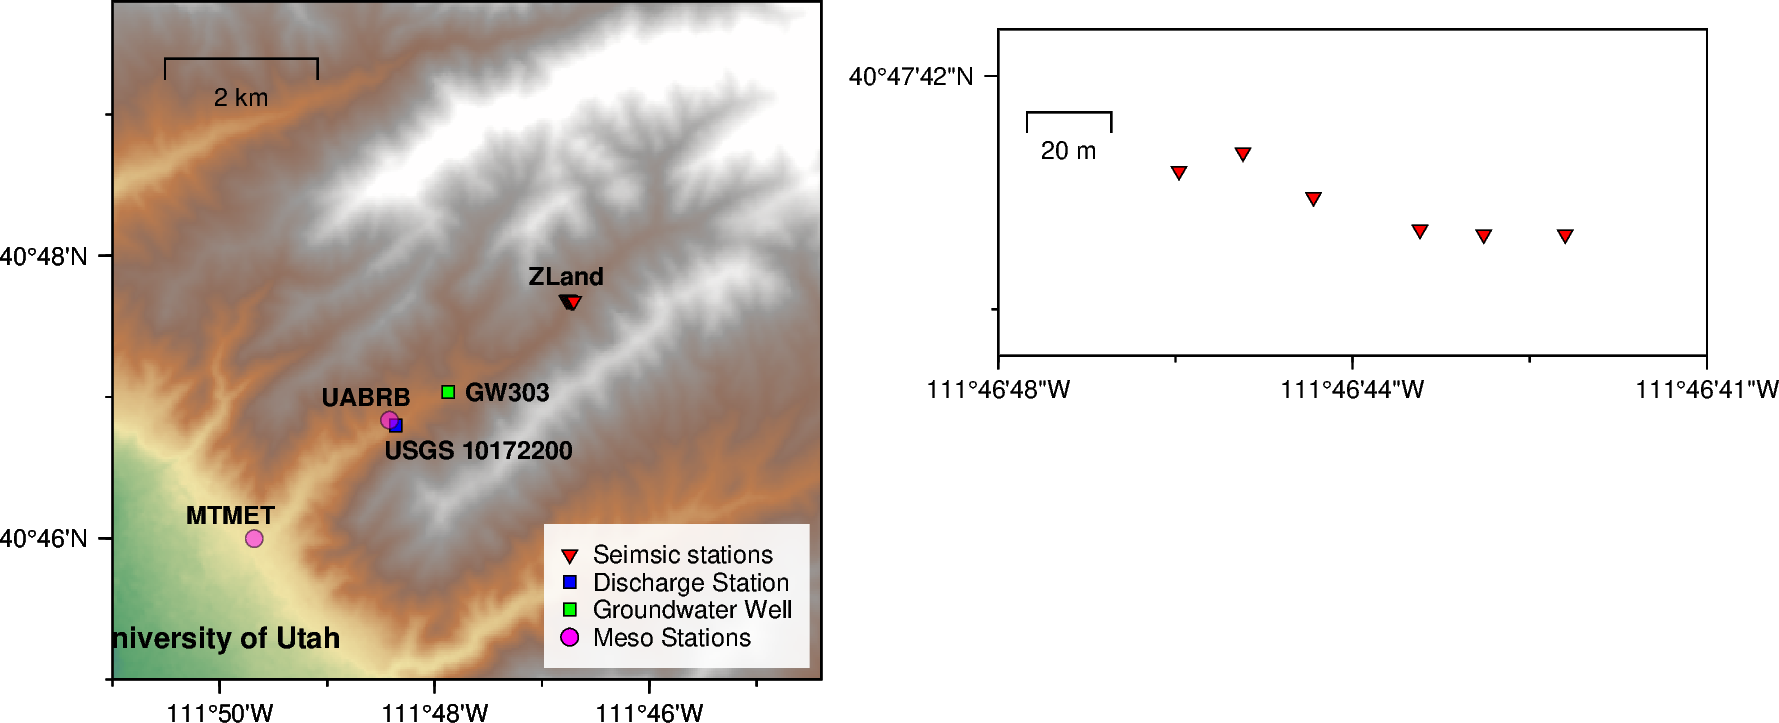

In [10]:
wells=well_loc.copy()
# --- Define map region with margin around data ---
region=[-111.85, -111.74, 40.75, 40.83]

print(region)
proj='M6c'


# --- Initialize PyGMT figure ---
fig = pygmt.Figure()
pygmt.config( MAP_FRAME_TYPE="plain" ,MAP_FRAME_PEN='0.5p', FONT_TITLE="10p", FONT_ANNOT='6p', )

fig.grdimage(region=region, grid="@earth_relief_01s", projection=proj, transparency=30, frame=["af", ])
fig.basemap(region=region, projection=proj , map_scale="g-111.83/40.822+w2k")
# grid = pygmt.datasets.load_earth_relief(resolution="01s", region=region)
# fig.grdimage(grid=grid, projection=proj, cmap="geo",shading=True, transparency=50, frame=["af", ])
fig.coast(region=region, projection=proj, frame="af",lakes=True,rivers="A/1p,blue,solid",
          borders="1/1p,black", water="lightblue", shorelines=True,)

# --- Plot stations ---
fig.plot(x=seis_sta['lon'], y=seis_sta['lat'], style="i0.15c", fill="red", pen="black", label="Seimsic stations")
for i, row in seis_sta.iterrows():
    fig.text(x=row['lon'], y=row['lat'], text='ZLand', font="6p,Helvetica-Bold", offset="0c/0.2c")
    break
    
# --- Plot discharge ---
fig.plot(x=DS_loc['stlo'], y=DS_loc['stla'], style="s0.15c", fill="blue", pen="black", label="Discharge Station")
for i, row in DS_loc.iterrows():
    fig.text(x=row['stlo'], y=row['stla'], text=row['stID'], font="6p,Helvetica-Bold", offset="0.7c/-0.2c")
  
# --- Plot well location ---
fig.plot(x=wells['stlo'], y=wells['stla'], style="s0.15c", fill="green", pen="black", label="Groundwater Well")
for i, row in wells.iterrows():
    fig.text(x=row['stlo'], y=row['stla'], text=row['stnm'], font="6p,Helvetica-Bold", offset="0.5c/0c")

# --- Plot meso locations ---
fig.plot(x=meso_loc['stlo'], y=meso_loc['stla'], style="c0.15c", fill="magenta", pen="black", label="Meso Stations", transparency=50)
for i, row in meso_loc.iterrows():
    fig.text(x=row['stlo'], y=row['stla'], text=row['stnm'], font="6p,Helvetica-Bold", offset="-0.2c/0.2c")
  
fig.text(x=-111.834, y=40.755, text='University of Utah', font="7p,Helvetica-Bold", )
# --- Add legend ---
fig.legend(position="JBR+jBR+o0.1c", box="1p,black+gwhite@10", )

# -------
region2=[-111.78, -111.778, 40.7944, 40.7951]
proj2=proj
fig.shift_origin(xshift="w+1.5c", yshift="h-3c")
# grid2 = pygmt.datasets.load_earth_relief(resolution="01m", region=region2)
fig.basemap(region=region2, projection=proj2 , map_scale="g-111.7798/40.7949+w20e", frame=["a0.001f0.0005", ] )
# fig.grdimage(grid=grid2, projection=proj2, cmap="geo", shading=True, transparency=50, )
# fig.grdimage(grid="@earth_relief_01s", projection=proj,  frame=["af", ])
fig.plot(x=seis_sta['lon'], y=seis_sta['lat'], style="i0.15c", fill="red", pen="black", label="Seimsic stations")
# for i, row in seis_sta.iterrows():
#     fig.text(x=row['lon'], y=row['lat'], text=row['stnm_renamed'], font="6p,Helvetica-Bold", offset="0c/0.2c")



# --- Show or save figure ---
fig.show(dpi=300)  
# fig.savefig("map_highres_stations.png", dpi=300)



[-111.85, -111.74, 40.75, 40.83]


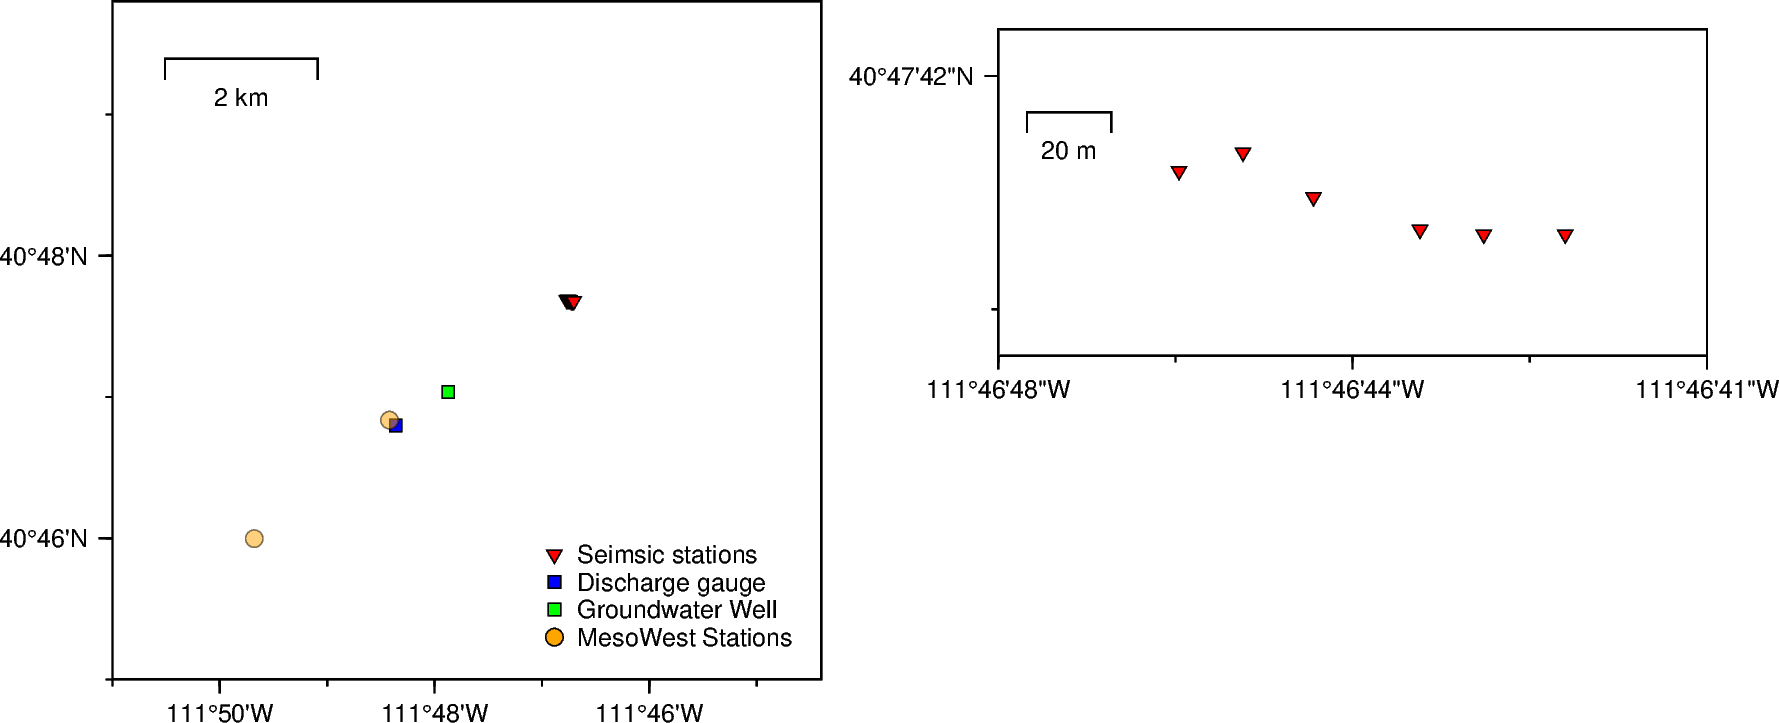

In [25]:
wells=well_loc.copy()
# --- Define map region with margin around data ---
region=[-111.85, -111.74, 40.75, 40.83]

print(region)
proj='M6c'


# --- Initialize PyGMT figure ---
fig = pygmt.Figure()
pygmt.config( MAP_FRAME_TYPE="plain" ,MAP_FRAME_PEN='0.5p', FONT_TITLE="10p", FONT_ANNOT='6p', )

grid = pygmt.datasets.load_earth_relief(resolution="01s", region=region)
fig.basemap(region=region, projection=proj , map_scale="g-111.83/40.822+w2k")
# fig.grdimage(grid=grid, projection=proj, cmap="geo",shading=True, transparency=50, frame=["af", ])
fig.coast(region=region, projection=proj, frame="af",lakes=True,rivers="A/1p,blue,solid",
          borders="1/1p,black", water="lightblue", shorelines=True,)

# --- Plot stations ---
fig.plot(x=seis_sta['lon'], y=seis_sta['lat'], style="i0.15c", fill="red", pen="black", label="Seimsic stations")
# for i, row in seis_sta.iterrows():
#     fig.text(x=row['lon'], y=row['lat'], text='001-006', font="6p,Helvetica-Bold", offset="0c/0.2c")
#     break
    
# --- Plot discharge ---
fig.plot(x=DS_loc['stlo'], y=DS_loc['stla'], style="s0.15c", fill="blue", pen="black", label="Discharge gauge")
# for i, row in DS_loc.iterrows():
#     fig.text(x=row['stlo'], y=row['stla'], text=row['stID'], font="6p,Helvetica-Bold", offset="0.7c/-0.2c")
  
# --- Plot well location ---
fig.plot(x=wells['stlo'], y=wells['stla'], style="s0.15c", fill="green", pen="black", label="Groundwater Well")
# for i, row in wells.iterrows():
#     fig.text(x=row['stlo'], y=row['stla'], text=row['stnm'], font="6p,Helvetica-Bold", offset="0.5c/0c")

# --- Plot meso locations ---
fig.plot(x=meso_loc['stlo'], y=meso_loc['stla'], style="c0.15c", fill="orange", pen="black", label="MesoWest Stations", transparency=50)
# for i, row in meso_loc.iterrows():
#     fig.text(x=row['stlo'], y=row['stla'], text=row['stnm'], font="6p,Helvetica-Bold", offset="-0.2c/0.2c")
  
# fig.text(x=-111.834, y=40.755, text='Univ of Utah', font="7p,Helvetica-Bold", )
# --- Add legend ---
fig.legend(position="JBR+jBR+o0.1c")

# -------
region2=[-111.78, -111.778, 40.7944, 40.7951]
proj2=proj
fig.shift_origin(xshift="w+1.5c", yshift="h-3c")
# grid2 = pygmt.datasets.load_earth_relief(resolution="01m", region=region2)
fig.basemap(region=region2, projection=proj2 , map_scale="g-111.7798/40.7949+w20e", frame=["a0.001f0.0005", ] )
# fig.grdimage(grid=grid2, projection=proj2, cmap="geo", shading=True, transparency=50, )
fig.plot(x=seis_sta['lon'], y=seis_sta['lat'], style="i0.15c", fill="red", pen="black", label="Seimsic stations")
# for i, row in seis_sta.iterrows():
#     fig.text(x=row['lon'], y=row['lat'], text=row['stnm'], font="6p,Helvetica-Bold", offset="0c/0.2c")



# --- Show or save figure ---
fig.show(dpi=300, transparent=True)
# fig.savefig("map_highres_stations.png", dpi=300)

